# <font color='black'>SME0205 - Métodos do Cálculo Numérico I</font>

## "Modelagem e previsão de crescimento populacional utilizando o método dos mínimos quadrados"

## Prof. Antonio Castelo Filho

### ICMC-USP

### Jun-2023

----

## Integrantes do Grupo:

**Aluno:** Anne Kéllen de Nazaré dos Reis Dias $\quad$ **N°USP:** 10552210

**Aluno:** Luiz Francisco Franca de Farias $\quad$ **N°USP:** 13686542

**Aluno:** Luís Roberto Piva $\quad$ **N°USP:** 13687727

----

In [1702]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

## Primeira parte: Leitura de dados e Gráficos de dispersão


In [1703]:
def ler_dados_csv(dados):
    anos = []
    populacao = []

    with open(dados, 'r') as arquivo:
        leitor_csv = csv.reader(arquivo)

        for linha in leitor_csv:
            anos.append(int(linha[0]))
            populacao.append(float(linha[1]))

    return anos, populacao


### (1.1) Leitura dos arquivos

In [1704]:
dados_brasil = 'brasil.csv'
dados_bulgaria = 'bulgaria.csv'
dados_china = 'china.csv'

anos_brasil, populacao_brasil = ler_dados_csv(dados_brasil)
anos_bulgaria, populacao_bulgaria = ler_dados_csv(dados_bulgaria)
anos_china, populacao_china = ler_dados_csv(dados_china)


### (1.2) Gráficos de dispersão

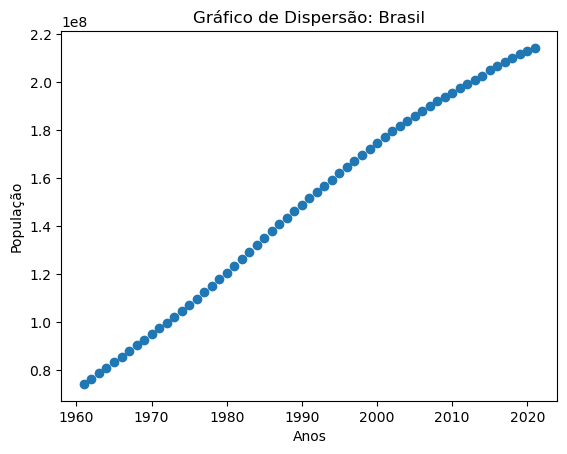

In [1705]:
plt.scatter(anos_brasil, populacao_brasil)

plt.title('Gráfico de Dispersão: Brasil')
plt.xlabel('Anos')
plt.ylabel('População')

plt.show()

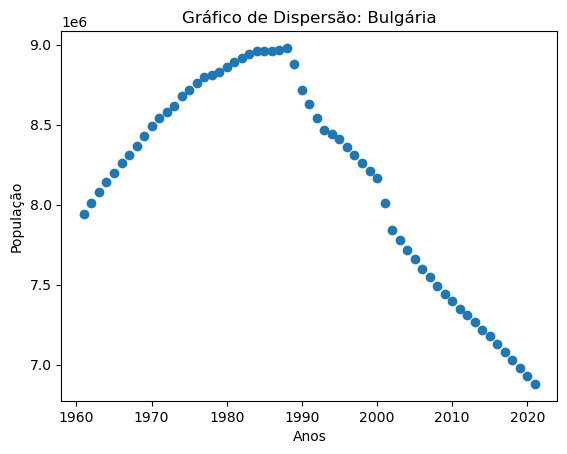

In [1706]:
plt.scatter(anos_bulgaria, populacao_bulgaria)

plt.title('Gráfico de Dispersão: Bulgária')
plt.xlabel('Anos')
plt.ylabel('População')

plt.show()

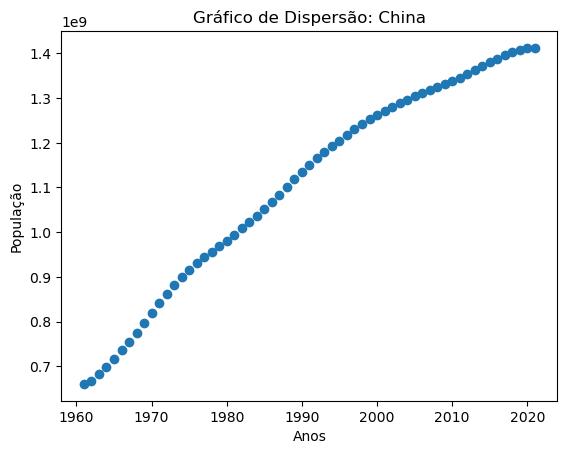

In [1707]:
plt.scatter(anos_china, populacao_china)

plt.title('Gráfico de Dispersão: China')
plt.xlabel('Anos')
plt.ylabel('População')

plt.show()

----

## Segunda parte: Cálculo das taxas de crescimento anuais

In [1753]:
taxa_crescimento_brasil = np.gradient(populacao_brasil, anos_brasil)
taxa_crescimento_bulgaria = np.gradient(populacao_bulgaria, anos_bulgaria)
taxa_crescimento_china = np.gradient(populacao_china, anos_china)


Text(0.5, 1.0, 'Taxa de Crescimento: China')

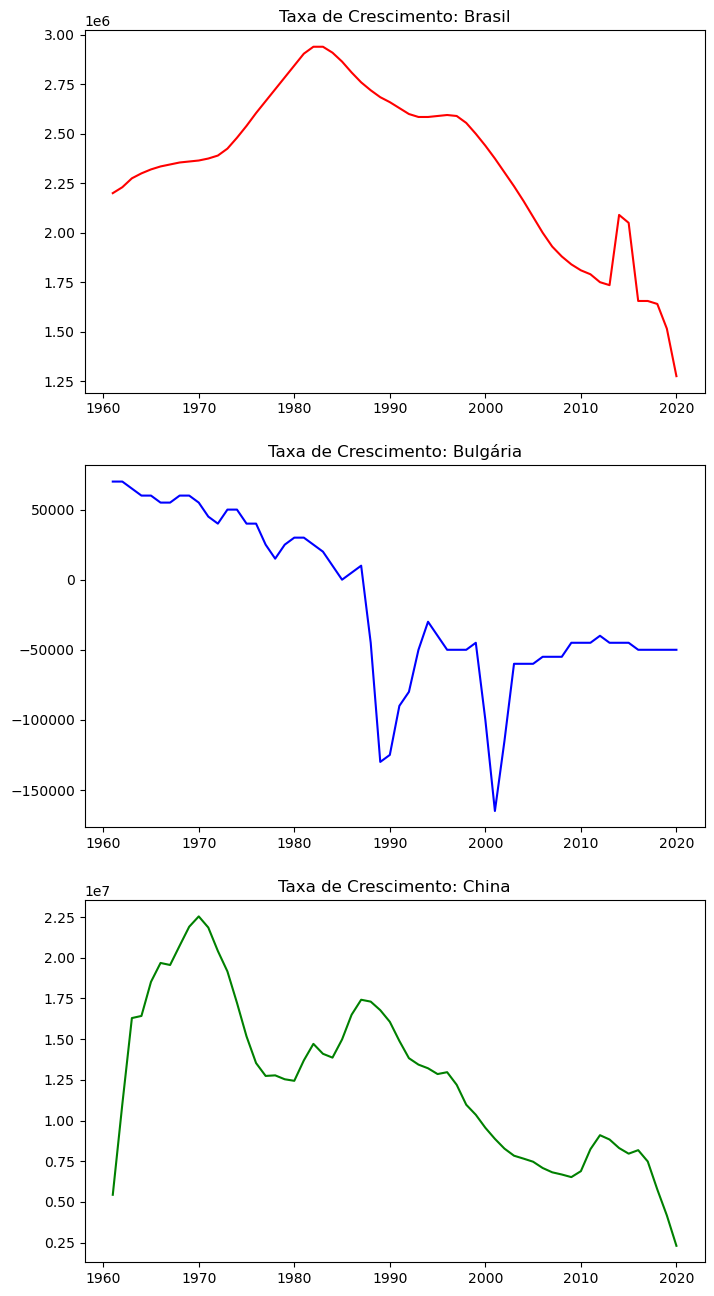

In [1756]:
fig, ax = plt.subplots(figsize=(8,16), nrows=3, ncols=1)

ax[0].plot(anos_brasil[:-1], taxa_crescimento_brasil[:-1], 'r', label='Brasil')
ax[0].set_title('Taxa de Crescimento: Brasil')

ax[1].plot(anos_bulgaria[:-1], taxa_crescimento_bulgaria[:-1], 'b', label='Bulgária')
ax[1].set_title('Taxa de Crescimento: Bulgária')

ax[2].plot(anos_china[:-1], taxa_crescimento_china[:-1], 'g', label='China')
ax[2].set_title('Taxa de Crescimento: China')


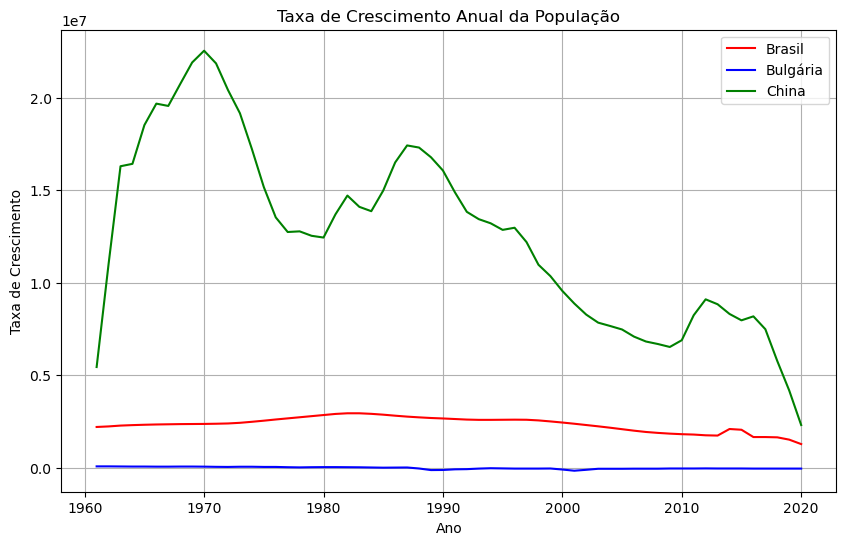

In [1710]:
plt.figure(figsize=(10, 6))

plt.plot(anos_brasil[:-1], taxa_crescimento_brasil[:-1], 'r', label='Brasil')
plt.plot(anos_bulgaria[:-1], taxa_crescimento_bulgaria[:-1], 'b', label='Bulgária')
plt.plot(anos_china[:-1], taxa_crescimento_china[:-1], 'g', label='China')

plt.xlabel('Ano')
plt.ylabel('Taxa de Crescimento')
plt.title('Taxa de Crescimento Anual da População')

plt.legend()
plt.grid(True)

plt.show()

----

## Terceira parte: Ajuste da curva dos dados populacionais utilizando o método dos mínimos quadrados

In [1711]:
def ajuste_minimos_quadrados(anos, pop, grau):
    A = np.vander(anos, grau+1) # cria a matriz Vandermonde
    coeficientes, _, _, _ = np.linalg.lstsq(A, pop, rcond=None)
    
    return coeficientes


In [1712]:
def calcular_mse(y_real, y_previsto):
    return np.mean((y_real - y_previsto)**2)


In [1713]:
def coeficiente_determinacao(y_real, y_previsto):
    correlacao = np.corrcoef(y_real, y_previsto)
    coef = correlacao[0, 1] ** 2
    
    return coef


### (3.1) Ajuste das curvas de população pelo método dos mínimos quadrados

In [1714]:
grau_curva = 2

coeficientes_brasil = ajuste_minimos_quadrados(anos_brasil, populacao_brasil, grau_curva)
coeficientes_bulgaria = ajuste_minimos_quadrados(anos_bulgaria, populacao_bulgaria, grau_curva)
coeficientes_china = ajuste_minimos_quadrados(anos_china, populacao_china, grau_curva)


### (3.1.1) Curva ajustada da população do Brasil,seu MSE e R²

In [1715]:
x_brasil = np.linspace(min(anos_brasil), max(anos_brasil), 100)
y_brasil = np.polyval(coeficientes_brasil, x_brasil)

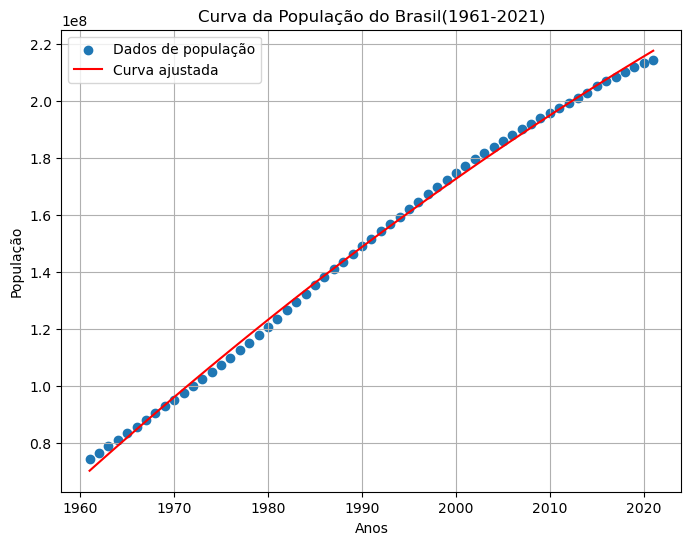

In [1716]:
plt.figure(figsize=(8, 6))

plt.scatter(anos_brasil, populacao_brasil, label='Dados de população')
plt.plot(x_brasil, y_brasil, 'r', label='Curva ajustada')

plt.xlabel('Anos')
plt.ylabel('População')

plt.title('Curva da População do Brasil(1961-2021)')
plt.legend()

plt.grid(True)
plt.show()


In [1717]:
mse_brasil = calcular_mse(populacao_brasil, np.polyval(coeficientes_brasil, anos_brasil))

print(f"Erro médio quadrático (MSE): {mse_brasil}")

Erro médio quadrático (MSE): 3215347101730.852


In [1718]:
coef_det_brasil = coeficiente_determinacao(populacao_brasil, np.polyval(coeficientes_brasil, anos_brasil))
print(f"Coeficiente de determinação (R²): {coef_det_brasil}")


Coeficiente de determinação (R²): 0.9982907992326633


### (3.1.2) Curva ajustada da população da Bulgária ,seu MSE e R²

In [1719]:
x_bulgaria = np.linspace(min(anos_bulgaria), max(anos_bulgaria), 100)
y_bulgaria = np.polyval(coeficientes_bulgaria, x_bulgaria)

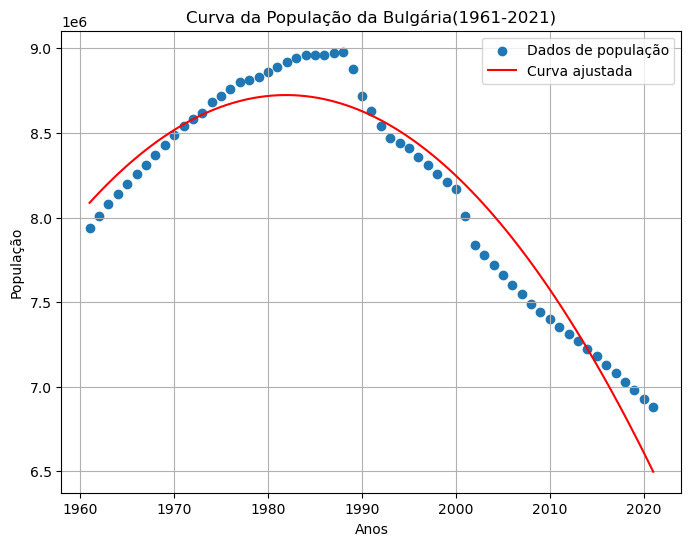

In [1720]:
plt.figure(figsize=(8, 6))

plt.scatter(anos_bulgaria, populacao_bulgaria, label='Dados de população')
plt.plot(x_bulgaria, y_bulgaria, 'r', label='Curva ajustada')

plt.xlabel('Anos')
plt.ylabel('População')

plt.title('Curva da População da Bulgária(1961-2021)')
plt.legend()

plt.grid(True)
plt.show()


In [1721]:
mse_bulgaria = calcular_mse(populacao_bulgaria, np.polyval(coeficientes_bulgaria, anos_bulgaria))

print(f"Erro médio quadrático (MSE): {mse_bulgaria}")

Erro médio quadrático (MSE): 30307816277.15164


In [1722]:
coef_det_bulgaria = coeficiente_determinacao(populacao_bulgaria, np.polyval(coeficientes_bulgaria, anos_bulgaria))
print(f"Coeficiente de determinação (R²): {coef_det_bulgaria}")


Coeficiente de determinação (R²): 0.9262374701469414


### (3.1.3) Curva ajustada da população da China, seu MSE e R²

In [1723]:
x_china = np.linspace(min(anos_china), max(anos_china), 100)
y_china = np.polyval(coeficientes_china, x_china)

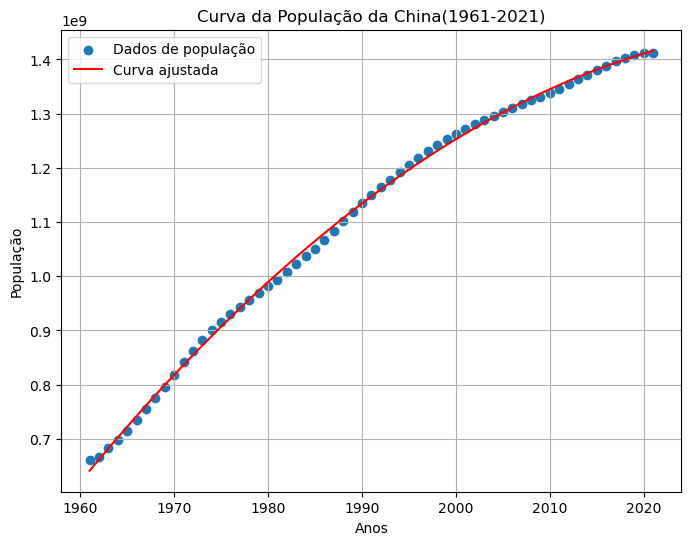

In [1724]:
plt.figure(figsize=(8, 6))

plt.scatter(anos_china, populacao_china, label='Dados de população')
plt.plot(x_china, y_china, 'r', label='Curva ajustada')

plt.xlabel('Anos')
plt.ylabel('População')

plt.title('Curva da População da China(1961-2021)')
plt.legend()

plt.grid(True)
plt.show()


In [1725]:
mse_china = calcular_mse(populacao_china, np.polyval(coeficientes_china, anos_china))

print(f"Erro médio quadrático (MSE): {mse_china}")

Erro médio quadrático (MSE): 54485299512597.71


In [1726]:
coef_det_china = coeficiente_determinacao(populacao_china, np.polyval(coeficientes_china, anos_china))
print(f"Coeficiente de determinação (R²): {coef_det_china}")


Coeficiente de determinação (R²): 0.9989737261513592


----

## Quarta parte: Ajuste da curva dos dados populacionais utilizando o método dos mínimos quadrados ponderados


In [1727]:
def calcular_pesos_ponderados(pop):
    erros_absolutos = np.abs(pop - np.mean(pop))
    pesos =  1 / erros_absolutos

    return pesos


In [1728]:
def calcular_pesos_criticos(pop):
    pesos = np.ones_like(pop)
    pesos[-10:] = 3  # Atribui um peso maior para os últimos 10 anos
   
    return pesos

In [1729]:
def ajuste_minimos_quadrados_ponderados(anos, pop, grau, pesos):
    A = np.vander(anos, grau + 1)
    W = np.diag(np.sqrt(pesos))
    
    A_pond = np.dot(W, A)
    y_pond = np.sqrt(pesos) * pop
    
    coeficientes = np.linalg.lstsq(A_pond, y_pond, rcond=None)[0]
    
    return coeficientes


### (4.1) Ajuste das curvas de população pelo método dos mínimos quadrados ponderados

In [1730]:
#pesos_brasil = calcular_pesos_ponderados(populacao_brasil)
#pesos_bulgaria = calcular_pesos_ponderados(populacao_bulgaria)
#pesos_china = calcular_pesos_ponderados(populacao_china)


In [1731]:
pesos_brasil = calcular_pesos_criticos(populacao_brasil)
pesos_bulgaria = calcular_pesos_criticos(populacao_bulgaria)
pesos_china = calcular_pesos_criticos(populacao_china)

In [1732]:
coeficientes_brasil_ponderado = ajuste_minimos_quadrados_ponderados(anos_brasil, populacao_brasil, grau_curva, pesos_brasil)
coeficientes_bulgaria_ponderado = ajuste_minimos_quadrados_ponderados(anos_bulgaria, populacao_bulgaria, grau_curva, pesos_bulgaria)
coeficientes_china_ponderado = ajuste_minimos_quadrados_ponderados(anos_china, populacao_china, grau_curva, pesos_china)


### (4.1.1) Curva ajustada da população do Brasil,seu MSE e R²

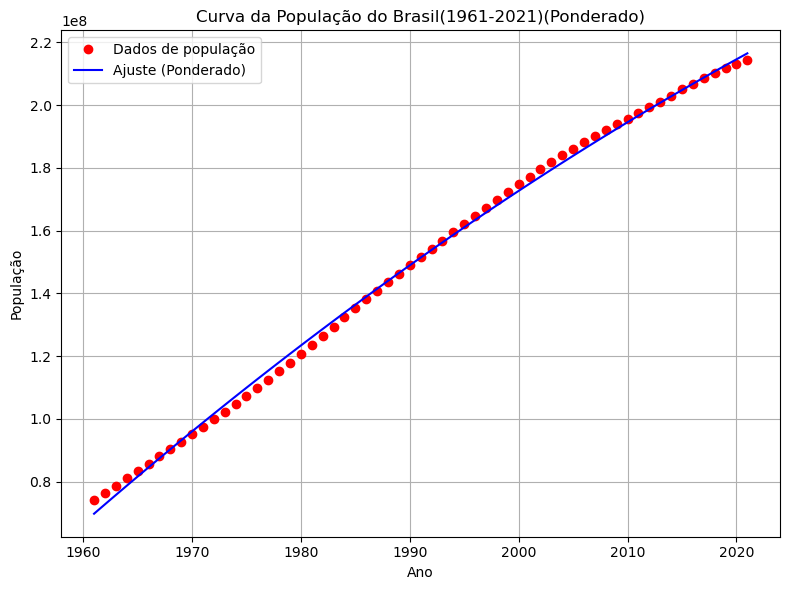

In [1733]:
plt.figure(figsize=(8, 6))

plt.plot(anos_brasil, populacao_brasil, 'ro', label='Dados de população')

x_brasil = np.linspace(min(anos_brasil), max(anos_brasil), 100)
y_brasil = np.polyval(coeficientes_brasil_ponderado, x_brasil)

plt.plot(x_brasil, y_brasil, 'b', label='Ajuste (Ponderado)')

plt.xlabel('Ano')
plt.ylabel('População')
plt.title('Curva da População do Brasil(1961-2021)(Ponderado)')

plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [1734]:
mse_brasil_pond = calcular_mse(populacao_brasil, np.polyval(coeficientes_brasil_ponderado, anos_brasil))

print(f"Erro médio quadrático (MSE/Ponderado): {mse_brasil_pond}")

Erro médio quadrático (MSE/Ponderado): 3375907509516.374


In [1735]:
coef_det_brasil_pond = coeficiente_determinacao(populacao_brasil, np.polyval(coeficientes_brasil_ponderado, anos_brasil))
print(f"Coeficiente de determinação (R²/Ponderado): {coef_det_brasil_pond}")


Coeficiente de determinação (R²/Ponderado): 0.9982388186360449


### (4.1.2) Curva ajustada da população da Bulgária ,seu MSE e R²

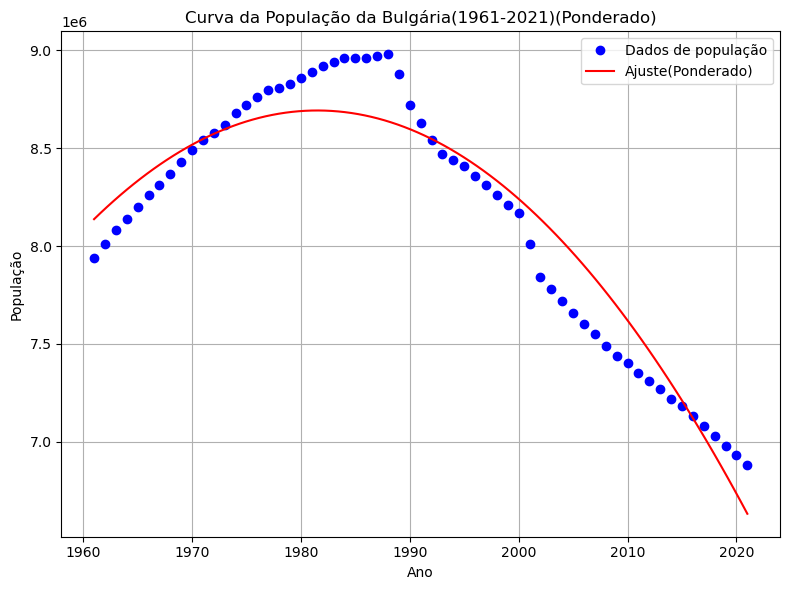

In [1736]:
plt.figure(figsize=(8, 6))

plt.plot(anos_bulgaria, populacao_bulgaria, 'bo', label='Dados de população')

x_bulgaria = np.linspace(min(anos_bulgaria), max(anos_bulgaria), 100)
y_bulgaria = np.polyval(coeficientes_bulgaria_ponderado, x_bulgaria)

plt.plot(x_bulgaria, y_bulgaria, 'r', label='Ajuste(Ponderado)')

plt.xlabel('Ano')
plt.ylabel('População')
plt.title('Curva da População da Bulgária(1961-2021)(Ponderado)')

plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [1737]:
mse_bulgaria_pond = calcular_mse(populacao_bulgaria, np.polyval(coeficientes_bulgaria_ponderado, anos_bulgaria))

print(f"Erro médio quadrático (MSE/Ponderado): {mse_bulgaria_pond}")

Erro médio quadrático (MSE/Ponderado): 32469318471.521393


In [1738]:
coef_det_bulgaria_pond = coeficiente_determinacao(populacao_bulgaria, np.polyval(coeficientes_bulgaria_ponderado, anos_bulgaria))
print(f"Coeficiente de determinação (R²/Ponderado): {coef_det_bulgaria_pond}")


Coeficiente de determinação (R²/Ponderado): 0.9258126606419655


### (4.1.3) Curva ajustada da população da China,seu MSE e R²

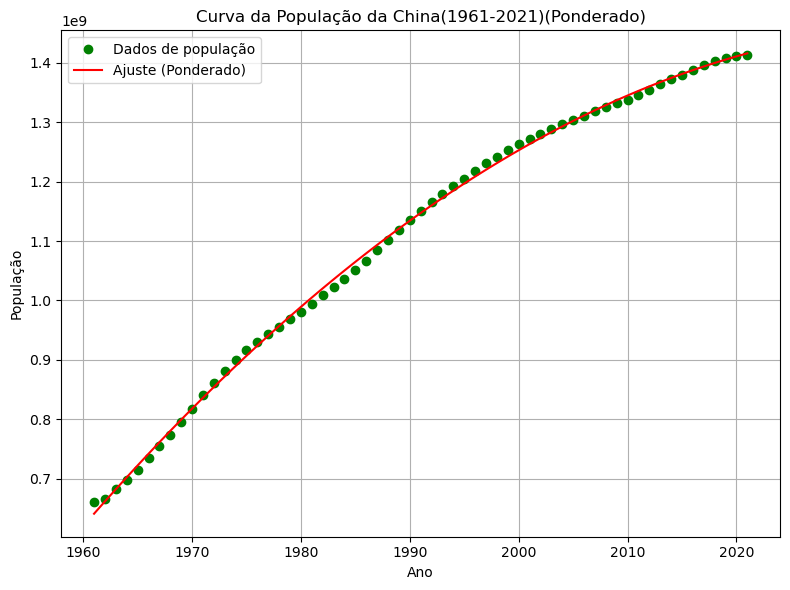

In [1739]:
plt.figure(figsize=(8, 6))

plt.plot(anos_china, populacao_china, 'go', label='Dados de população')

x_china = np.linspace(min(anos_china), max(anos_china), 100)
y_china = np.polyval(coeficientes_china_ponderado, x_china)

plt.plot(x_china, y_china, 'r', label='Ajuste (Ponderado)')

plt.xlabel('Ano')
plt.ylabel('População')
plt.title('Curva da População da China(1961-2021)(Ponderado)')

plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [1740]:
mse_china_pond = calcular_mse(populacao_china, np.polyval(coeficientes_china_ponderado, anos_china))

print(f"Erro médio quadrático (MSE/Ponderado): {mse_china_pond}")

Erro médio quadrático (MSE/Ponderado): 54569900295413.03


In [1741]:
coef_det_china_pond = coeficiente_determinacao(populacao_china, np.polyval(coeficientes_china_ponderado, anos_china))
print(f"Coeficiente de determinação (R²/Ponderado): {coef_det_china_pond}")


Coeficiente de determinação (R²/Ponderado): 0.9989737183045013


----

## Quinta parte: Previsão do crescimento populacional utilizando o método dos mínimos quadrados polinomialmente

In [1742]:
def previsao_populacional(coeficientes, futuro):
    grau = len(coeficientes) - 1
    A = np.vander(futuro, grau + 1)
    predicao = np.dot(A, coeficientes)
    
    return predicao


### (5.1) Previsão Polinomial Populacional de 2022 a 2030 pelo método dos mínimos quadrados

In [1743]:
anos_futuros = range(2022, 2031) 

previsao_brasil_polinomial = previsao_populacional(coeficientes_brasil, anos_futuros)
previsao_bulgaria_polinomial = previsao_populacional(coeficientes_bulgaria, anos_futuros)
previsao_china_polinomial = previsao_populacional(coeficientes_china, anos_futuros)



### (5.1.1) Previsão para a população brasileira

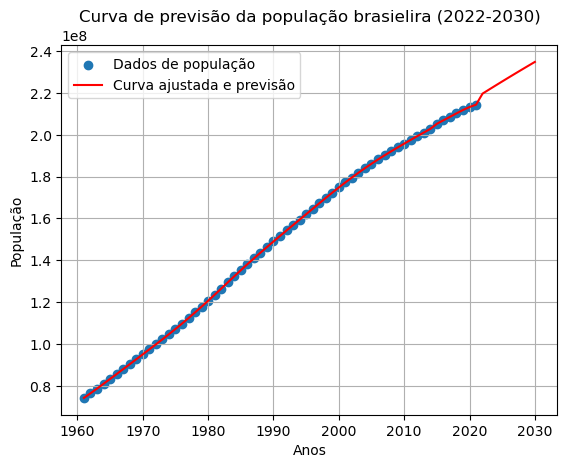

In [1744]:
# Plotagem dos dados e da curva ajustada
plt.scatter(anos_brasil, populacao_brasil, label='Dados de população')
plt.plot(anos_brasil + list(anos_futuros), list(populacao_brasil) + list(previsao_brasil_polinomial), 'r', label='Curva ajustada e previsão')

plt.xlabel('Anos')
plt.ylabel('População')

plt.title('Curva de previsão da população brasielira (2022-2030)')
plt.legend()

plt.grid(True)
plt.show()


### (5.1.2) Previsão para a população búlgara

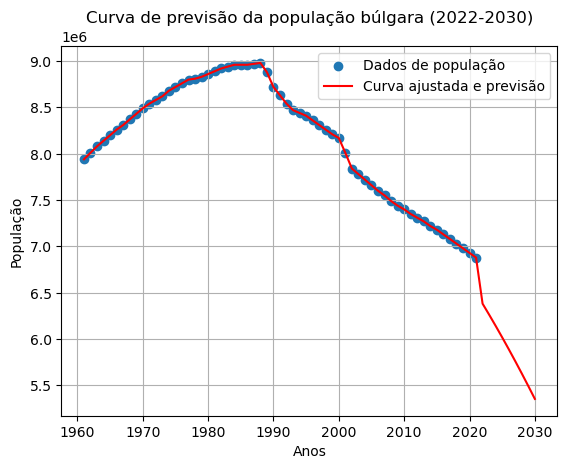

In [1745]:
# Plotagem dos dados e da curva ajustada
plt.scatter(anos_bulgaria, populacao_bulgaria, label='Dados de população')
plt.plot(anos_bulgaria + list(anos_futuros), list(populacao_bulgaria) + list(previsao_bulgaria_polinomial), 'r', label='Curva ajustada e previsão')

plt.xlabel('Anos')
plt.ylabel('População')

plt.title('Curva de previsão da população búlgara (2022-2030)')
plt.legend()

plt.grid(True)
plt.show()


### (5.1.3) Previsão para a população chinesa

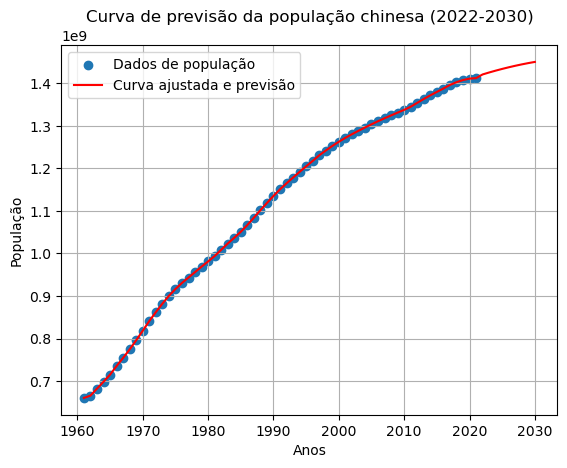

In [1746]:
# Plotagem dos dados e da curva ajustada
plt.scatter(anos_china, populacao_china, label='Dados de população')
plt.plot(anos_china + list(anos_futuros), list(populacao_china) + list(previsao_china_polinomial), 'r', label='Curva ajustada e previsão')

plt.xlabel('Anos')
plt.ylabel('População')

plt.title('Curva de previsão da população chinesa (2022-2030)')
plt.legend()

plt.grid(True)
plt.show()


### (5.2) Comparação da previsão do crescimento populacional entre os três países

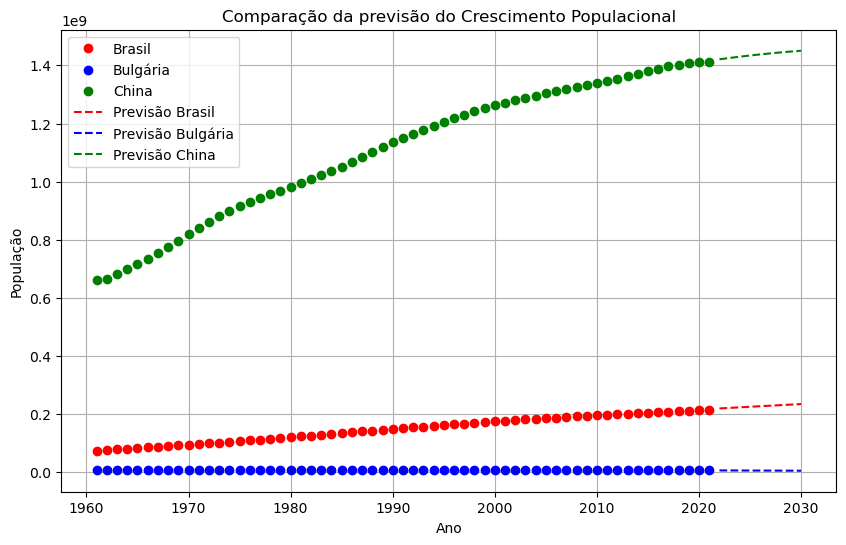

In [1747]:
plt.figure(figsize=(10, 6))

plt.plot(anos_brasil, populacao_brasil, 'ro', label='Brasil')
plt.plot(anos_bulgaria, populacao_bulgaria, 'bo', label='Bulgária')
plt.plot(anos_china, populacao_china, 'go', label='China')

plt.plot(anos_futuros, previsao_brasil_polinomial, 'r--', label='Previsão Brasil')
plt.plot(anos_futuros, previsao_bulgaria_polinomial, 'b--', label='Previsão Bulgária')
plt.plot(anos_futuros, previsao_china_polinomial, 'g--', label='Previsão China')

plt.xlabel('Ano')
plt.ylabel('População')
plt.title('Comparação da previsão do Crescimento Populacional')

plt.legend()
plt.grid(True)
plt.show()


----

## Sexta parte:  Previsão do crescimento populacional utilizando o método dos mínimos quadrados ponderados polinomialmente


### (6.1) Previsão Polinomial Populacional de 2022 a 2030 pelo método dos mínimos quadrados ponderados


In [1748]:
previsao_brasil_polinomial_ponderado = previsao_populacional(coeficientes_brasil_ponderado, anos_futuros)
previsao_bulgaria_polinomial_ponderado = previsao_populacional(coeficientes_bulgaria_ponderado, anos_futuros)
previsao_china_polinomial_ponderado = previsao_populacional(coeficientes_china_ponderado, anos_futuros)


### (6.1.1) Previsão para a população brasileira

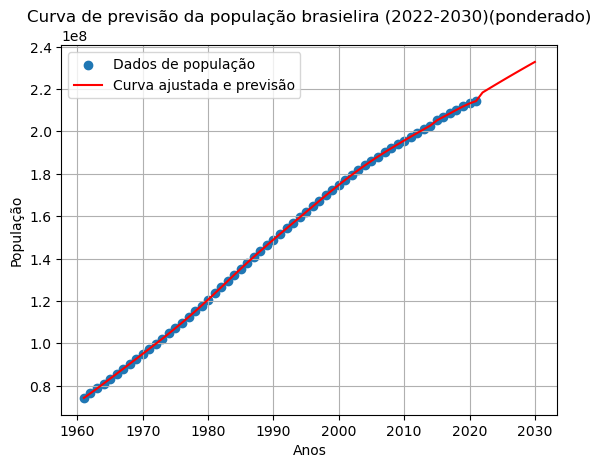

In [1749]:
# Plotagem dos dados e da curva ajustada
plt.scatter(anos_brasil, populacao_brasil, label='Dados de população')
plt.plot(anos_brasil + list(anos_futuros), list(populacao_brasil) + list(previsao_brasil_polinomial_ponderado), 'r', label='Curva ajustada e previsão')

plt.xlabel('Anos')
plt.ylabel('População')

plt.title('Curva de previsão da população brasielira (2022-2030)(ponderado)')
plt.legend()

plt.grid(True)
plt.show()


### (6.1.2) Previsão para a população búlgara

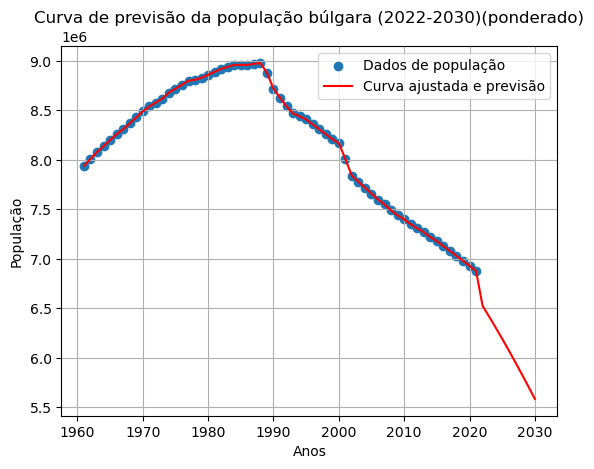

In [1750]:
# Plotagem dos dados e da curva ajustada
plt.scatter(anos_bulgaria, populacao_bulgaria, label='Dados de população')
plt.plot(anos_bulgaria + list(anos_futuros), list(populacao_bulgaria) + list(previsao_bulgaria_polinomial_ponderado), 'r', label='Curva ajustada e previsão')

plt.xlabel('Anos')
plt.ylabel('População')

plt.title('Curva de previsão da população búlgara (2022-2030)(ponderado)')
plt.legend()

plt.grid(True)
plt.show()


### (6.1.3) Previsão para a população chinesa

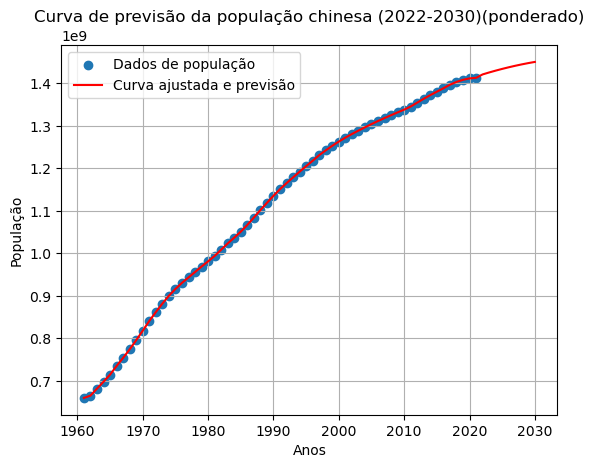

In [1751]:
# Plotagem dos dados e da curva ajustada
plt.scatter(anos_china, populacao_china, label='Dados de população')
plt.plot(anos_china + list(anos_futuros), list(populacao_china) + list(previsao_china_polinomial_ponderado), 'r', label='Curva ajustada e previsão')

plt.xlabel('Anos')
plt.ylabel('População')

plt.title('Curva de previsão da população chinesa (2022-2030)(ponderado)')
plt.legend()

plt.grid(True)
plt.show()


### (6.2) Comparação da previsão do crescimento populacional entre os três países

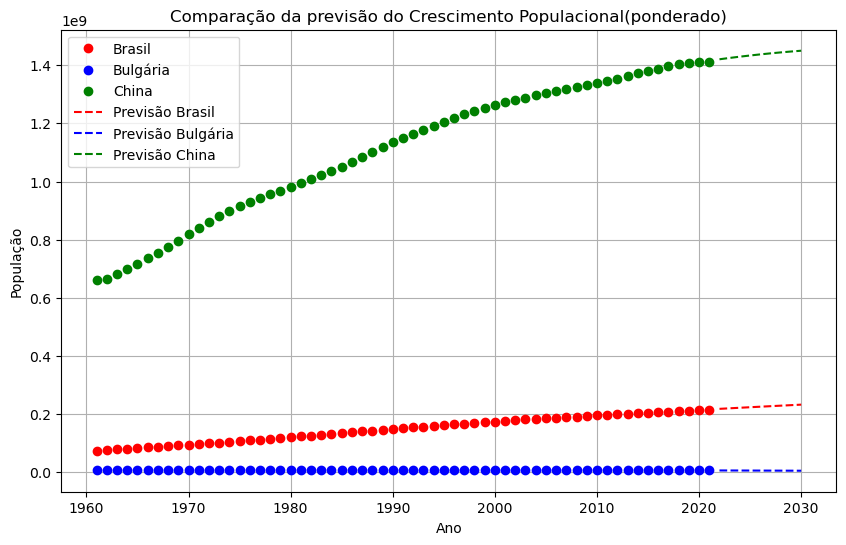

In [1752]:
plt.figure(figsize=(10, 6))

plt.plot(anos_brasil, populacao_brasil, 'ro', label='Brasil')
plt.plot(anos_bulgaria, populacao_bulgaria, 'bo', label='Bulgária')
plt.plot(anos_china, populacao_china, 'go', label='China')

plt.plot(anos_futuros, previsao_brasil_polinomial_ponderado, 'r--', label='Previsão Brasil')
plt.plot(anos_futuros, previsao_bulgaria_polinomial_ponderado, 'b--', label='Previsão Bulgária')
plt.plot(anos_futuros, previsao_china_polinomial_ponderado, 'g--', label='Previsão China')

plt.xlabel('Ano')
plt.ylabel('População')
plt.title('Comparação da previsão do Crescimento Populacional(ponderado)')

plt.legend()
plt.grid(True)
plt.show()
